[INFO] MySQL pool initialized
==== เริ่มการทดลอง Grid Search ====
POP=10 GEN=10 CO=0.4 MUT=0.01 STAG=5 | Avg Fitness=42.044 ± 0.043
POP=10 GEN=10 CO=0.4 MUT=0.01 STAG=10 | Avg Fitness=42.020 ± 0.035
POP=10 GEN=10 CO=0.4 MUT=0.01 STAG=20 | Avg Fitness=42.078 ± 0.043
POP=10 GEN=10 CO=0.4 MUT=0.01 STAG=30 | Avg Fitness=42.111 ± 0.305
POP=10 GEN=10 CO=0.4 MUT=0.01 STAG=40 | Avg Fitness=42.148 ± 0.022
POP=10 GEN=10 CO=0.4 MUT=0.01 STAG=50 | Avg Fitness=42.019 ± 0.196
POP=10 GEN=10 CO=0.4 MUT=0.05 STAG=5 | Avg Fitness=42.160 ± 0.082
POP=10 GEN=10 CO=0.4 MUT=0.05 STAG=10 | Avg Fitness=42.213 ± 0.107
POP=10 GEN=10 CO=0.4 MUT=0.05 STAG=20 | Avg Fitness=42.068 ± 0.069
POP=10 GEN=10 CO=0.4 MUT=0.05 STAG=30 | Avg Fitness=42.054 ± 0.049
POP=10 GEN=10 CO=0.4 MUT=0.05 STAG=40 | Avg Fitness=42.136 ± 0.148
POP=10 GEN=10 CO=0.4 MUT=0.05 STAG=50 | Avg Fitness=42.030 ± 0.054
POP=10 GEN=10 CO=0.4 MUT=0.1 STAG=5 | Avg Fitness=42.142 ± 0.104
POP=10 GEN=10 CO=0.4 MUT=0.1 STAG=10 | Avg Fitness=42.094 ± 0.021
P

C:\Users\fzopr\AppData\Local\Temp\ipykernel_28160\3357415998.py:75: UserWarning: Glyph 3612 (\N{THAI CHARACTER PHO PHUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fzopr\AppData\Local\Temp\ipykernel_28160\3357415998.py:75: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fzopr\AppData\Local\Temp\ipykernel_28160\3357415998.py:75: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fzopr\AppData\Local\Temp\ipykernel_28160\3357415998.py:75: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fzopr\AppData\Local\Temp\ipykernel_28160\3357415998.py:75: UserWarning: Glyph 3608 (\N{THAI CHARACTER THO THONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fzopr\AppData\Local\Temp\ipykernel_28160\3357415998.py:75: UserWarning: Glyph 3660 (\N{THAI CHARACTER

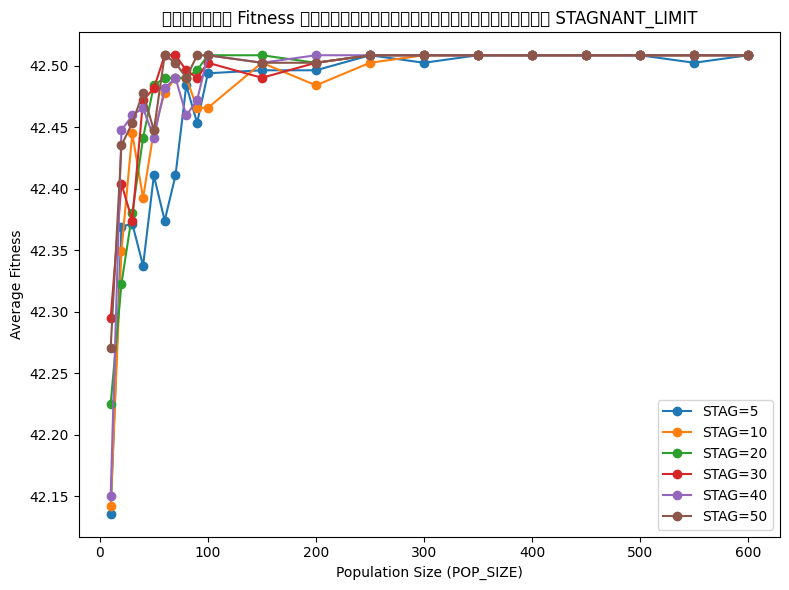

In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from main import run_ga, GA_CONSTANTS, load_theta_config

# ----------------------------- CONFIG -----------------------------
pop_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]            # ขนาดประชากร
max_gens = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300]
crossover_rates = [0.4, 0.6, 0.8]
mutation_rates = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
stagnant_limits = [5, 10, 20, 30, 40, 50]
n_trials = 3

# ข้อมูลฮีโร่/เลน/คลาส ใช้เป็นเคสตัวอย่าง (แก้ตามระบบของคุณ)
hero = "H001"      
lane = "Mid"
hero_class = "Mage"
phase = "Late"   # หรือจะวนทั้ง 3 phase ก็ได้ (Early, Mid, Late)

# ---------------------- เตรียมเก็บผลลัพธ์ ------------------------
results = []

print('==== เริ่มการทดลอง Grid Search ====')
for (pop_size, max_gen, c_rate, m_rate, stagnant) in itertools.product(
        pop_sizes, max_gens, crossover_rates, mutation_rates, stagnant_limits):
    # เซ็ตค่าพารามิเตอร์ไปที่ main.py
    GA_CONSTANTS['POP_SIZE'] = pop_size
    GA_CONSTANTS['MAX_GEN'] = max_gen
    GA_CONSTANTS['CROSSOVER_RATE'] = c_rate
    GA_CONSTANTS['BASE_MUT_RATE'] = m_rate
    GA_CONSTANTS['STAGNANT_LIMIT'] = stagnant

    fitness_list = []
    for trial in range(n_trials):
        build, fitness = run_ga(
            hero=hero,
            lane=lane,
            hero_class=hero_class,
            phase=phase
        )
        fitness_list.append(fitness)
    avg_fitness = np.mean(fitness_list)
    std_fitness = np.std(fitness_list)
    results.append({
        'POP_SIZE': pop_size,
        'MAX_GEN': max_gen,
        'CROSSOVER_RATE': c_rate,
        'BASE_MUT_RATE': m_rate,
        'STAGNANT_LIMIT': stagnant,
        'avg_fitness': avg_fitness,
        'std_fitness': std_fitness
    })
    print(f"POP={pop_size} GEN={max_gen} CO={c_rate} MUT={m_rate} STAG={stagnant} | "
          f"Avg Fitness={avg_fitness:.3f} ± {std_fitness:.3f}")

# --------------------- ผลลัพธ์เป็น DataFrame ---------------------
df = pd.DataFrame(results)
df.to_csv('ga_param_search_results.csv', index=False)
print("บันทึกผลลัพธ์ลงไฟล์ ga_param_search_results.csv แล้ว")

# ------------------------- วาดกราฟตัวอย่าง -----------------------
# เปรียบเทียบ POP_SIZE vs AVG_FITNESS โดยถือค่าอื่นคงที่
fig, ax = plt.subplots(figsize=(8, 6))
for stagnant in stagnant_limits:
    subdf = df[(df['MAX_GEN'] == 60) & 
               (df['CROSSOVER_RATE'] == 0.8) & 
               (df['BASE_MUT_RATE'] == 0.05) & 
               (df['STAGNANT_LIMIT'] == stagnant)]
    ax.plot(subdf['POP_SIZE'], subdf['avg_fitness'], marker='o', label=f'STAG={stagnant}')
ax.set_xlabel('Population Size (POP_SIZE)')
ax.set_ylabel('Average Fitness')
ax.set_title('ผลลัพธ์ Fitness เฉลี่ยเทียบขนาดประชากรและ STAGNANT_LIMIT')
ax.legend()
plt.tight_layout()
plt.show()

# สามารถวาดกราฟแบบอื่นหรือแยก parameter เพิ่มเติมได้ตามต้องการ
